In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

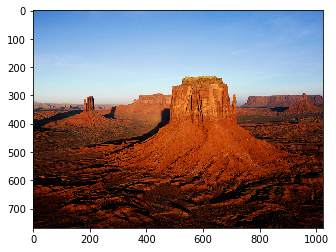

image.shape =  (768, 1024, 3)


In [2]:
# A sample image

# Penguins.jpg
image = plt.imread('demo.jpg')

fig, ax = plt.subplots()
ax.imshow(image)
# ax.axis('off')  # clear x-axis and y-axis

plt.show()
print("image.shape = ",image.shape)

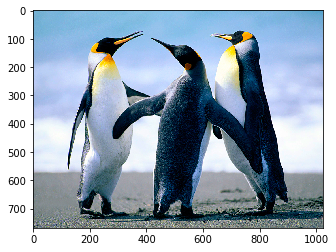

image.shape =  (768, 1024, 3)


In [3]:
# A sample image

# Penguins.jpg
image2 = plt.imread('Penguins.jpg')

fig, ax = plt.subplots()
ax.imshow(image2)
# ax.axis('off')  # clear x-axis and y-axis

plt.show()
print("image.shape = ",image2.shape)

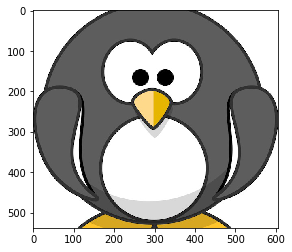

image.shape =  (538, 605, 3)
[255 255 255]


In [4]:
# A sample image

# Penguins.jpg
image1 = plt.imread('peo.jpg')

fig, ax = plt.subplots()
ax.imshow(image1)
# ax.axis('off')  # clear x-axis and y-axis

plt.show()
print("image.shape = ",image1.shape)
print(image1[0][0])

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ..., 
       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255,

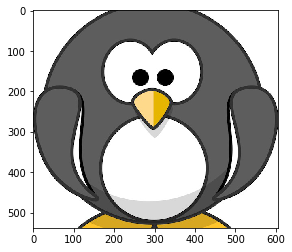

In [5]:
plt.imshow(image1)
image1

### Kmeans算法
> input: K, data #簇数，数据 
<br>output：dataClass # [0,k-1 ]
1. 随机初始化K个中心点，计算 E^
2. 按照最近邻，分类。
3. 算出下一个中心。计算 E
4. 如果E - E^ > 迭代值。
>>4.1 是，则回到2 <br>
4.2 否，退出

## 计算上一个中心的价值函数E ，和下一个中心resCenter

In [12]:
def cost(data, centerList, k, log=False):
    shape = data.shape
    res = np.zeros(shape, dtype=np.uint8)
    resCenter = np.zeros((k, shape[2]+1))
    costE=0.0
    
    color = 255.0 / k    
    for i in range(shape[0]):
        for j in range(shape[1]):
            minD = 1e9
            minId = 0
            for center in range(k):               
                
#                                是的，与物理距离无关。新的中心也是RGB的三个值
                minue = centerList[center] -  data[i][j]
                dist = np.sum(np.dot(minue, minue))  # 此处距离还有问题。只考虑颜色，不考虑 x,y吗
#                 print("data[i][j] = ",data[i][j])
#                 print("centerList[center] = ", centerList[center])
#                 print("dist = ", dist)
    
                if(dist < minD):
                    minD = dist
                    minId = center
            #归为了某一类
            res[i][j] = centerList[minId]
            costE += minD
            #统计
            resCenter[minId] += np.concatenate((data[i, j], [1]))
       
    if(log):
        print("before 除法，中心点: \n",resCenter)
        
    for cen in range(k):
        if(resCenter[cen][3] != 0):
            resCenter[cen] /= resCenter[cen][3]
        
    if(log):    
        print("after: 除法，中心点：\n",resCenter)
    resCenter = np.delete(resCenter, 3, axis = 1)#删除 resCenter的第四列
    resCenter = resCenter.astype(int)#变为整数
    
    
    if(log):
        print("去掉计数列，中心点：\n",resCenter)
        print("E = ", costE)
        # https://blog.csdn.net/u013608424/article/details/80117178 imshow颜色问题。
        # 原来是数据类型的关系，，dtype要是 uint8才行。。。。
    plt.imshow(res, cmap=plt.get_cmap('hot'))
    plt.show()
    return costE, resCenter              

## Test Cost函数的正确性

before 除法，中心点: 
 [[ 37720992.  37623498.  37411684.    149742.]
 [ 15367667.  14953248.  13716207.    175748.]]
after: 除法，中心点：
 [[ 251.90655928  251.25547942  249.84095311    1.        ]
 [  87.44149009   85.08346041   78.0447402     1.        ]]
去掉计数列，中心点：
 [[251 251 249]
 [ 87  85  78]]
E =  716262730.0


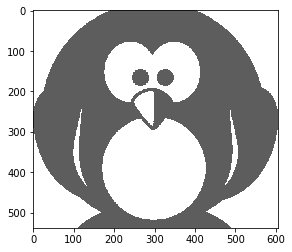

<class 'numpy.float64'>
<class 'numpy.ndarray'>


In [7]:
#传入 白色、灰色两个点，作为初始点，计算cost、类别
a, b = cost(image1, [[255,255,255 ], [93, 93, 93 ]], 2, True)

print(type(a))
print(type(b))

### 一些不常用的 库函数，
1. dot点乘
2. concatenate数组拼接



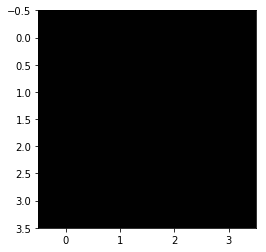

In [16]:
one = np.ones([16, 3])
white = [255, 255, 255]
for i in range(16):
    one[i] *= white
two = one.reshape(4,4,3)

plt.imshow(two, cmap=plt.get_cmap('hot'))  
plt.show()

12
1000000000.0
[2 2 2 1 2 3]


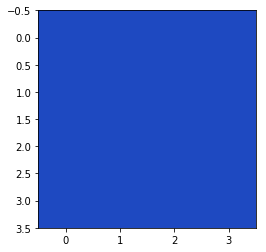

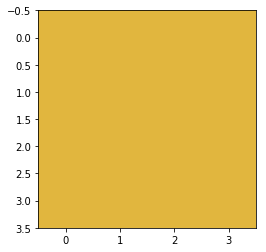

array([[225, 182,  62],
       [225, 182,  62],
       [225, 182,  62],
       [225, 182,  62],
       [225, 182,  62],
       [225, 182,  62],
       [225, 182,  62],
       [225, 182,  62],
       [225, 182,  62],
       [225, 182,  62],
       [225, 182,  62],
       [225, 182,  62],
       [225, 182,  62],
       [225, 182,  62],
       [225, 182,  62],
       [225, 182,  62]], dtype=uint8)

In [8]:
minD = 1e9
a= np.array([1,2,3])
b= np.array([2,2,2])
print(np.dot(a, b) )
print(minD )
print(np.concatenate((b, a)) )

one = np.ones([16, 3], dtype=np.uint8)
yellow = np.array([225, 182, 62], dtype=np.uint8)
white = [255, 255, 255]
for i in range(16):
    one[i] *= yellow
two = one.reshape(4,4,3)

plt.imshow(255-two, cmap=plt.get_cmap('hot'))  
plt.show()

plt.imshow(two)
plt.show()
one

# Kmeans算法主函数

In [9]:
def My_Kmeans(data1, K, echos=20, minDiff=1000, log=False, rand = False):
    shape = data1.shape
    if(rand == False):
        np.random.seed(1)

    
    center = np.random.randint(255, size=[K, shape[2]])
    
#     x = np.random.randint(shape[0], size=[K, 1])
#     y = np.random.randint(shape[1], size=[K, 1])
#     center = np.concatenate( (x,y) , axis=1)
    
    if(log):
        print("center :", center)
    costNow, centerNow = cost(data1, center , K, log)
    
    center = centerNow
    costP = costNow
    for echo in range(echos):
        
        costNow, centerNow = cost(data1, center, K, log)
        print("聚类第%d次"% echo)
        
        diff = costP - costNow
        print("diff = ", diff)
        if( diff < minDiff):
            break
        else:
            if(log):
                print("center :", costNow)
                print("costP - costNow :", costP - costNow)
            center = centerNow
            costP = costNow
            

# 对卡通企鹅 图像进行聚类

center : [[ 37 235 140]
 [ 72 137 203]
 [133  79 192]]
before 除法，中心点: 
 [[  6.37500000e+03   5.45400000e+03   7.00000000e+01   2.90000000e+01]
 [  2.36530000e+04   2.43100000e+04   2.39370000e+04   9.90000000e+01]
 [  5.30586310e+07   5.25469820e+07   5.11038840e+07   3.25362000e+05]]
after: 除法，中心点：
 [[ 219.82758621  188.06896552    2.4137931     1.        ]
 [ 238.91919192  245.55555556  241.78787879    1.        ]
 [ 163.07568493  161.5031319   157.06777067    1.        ]]
去掉计数列，中心点：
 [[219 188   2]
 [238 245 241]
 [163 161 157]]
E =  10367729666.0


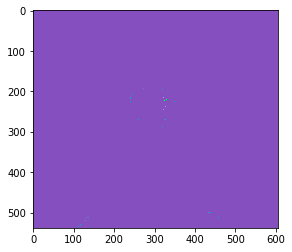

before 除法，中心点: 
 [[  1.87885600e+06   1.46804500e+06   2.37957000e+05   8.54500000e+03]
 [  3.73539060e+07   3.72887470e+07   3.71521610e+07   1.48088000e+05]
 [  1.38558970e+07   1.38199540e+07   1.37377730e+07   1.68857000e+05]]
after: 除法，中心点：
 [[ 219.87782329  171.80163839   27.84751317    1.        ]
 [ 252.24127546  251.80127357  250.8789436     1.        ]
 [  82.05698905   81.84412846   81.35743854    1.        ]]
去掉计数列，中心点：
 [[219 171  27]
 [252 251 250]
 [ 82  81  81]]
E =  3641604788.0


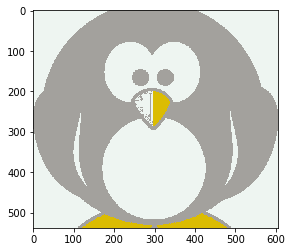

聚类第0次
diff =  6726124878.0
center : 3641604788.0
costP - costNow : 6726124878.0
before 除法，中心点: 
 [[  1.92996100e+06   1.51323000e+06   2.69521000e+05   8.69600000e+03]
 [  3.76809840e+07   3.75935110e+07   3.74067670e+07   1.49630000e+05]
 [  1.34777140e+07   1.34700050e+07   1.34516030e+07   1.67164000e+05]]
after: 除法，中心点：
 [[ 221.93663753  174.01448942   30.99367525    1.        ]
 [ 251.82773508  251.24313974  249.99510125    1.        ]
 [  80.62569692   80.57958053   80.46949702    1.        ]]
去掉计数列，中心点：
 [[221 174  30]
 [251 251 249]
 [ 80  80  80]]
E =  402215764.0


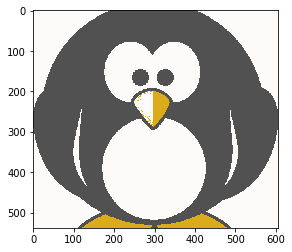

聚类第1次
diff =  3239389024.0
center : 402215764.0
costP - costNow : 3239389024.0
before 除法，中心点: 
 [[  1.95718700e+06   1.53725100e+06   2.86244000e+05   8.81200000e+03]
 [  3.76615900e+07   3.75773910e+07   3.73981840e+07   1.49561000e+05]
 [  1.34698820e+07   1.34621040e+07   1.34434630e+07   1.67117000e+05]]
after: 除法，中心点：
 [[ 222.10474353  174.44972764   32.48343168    1.        ]
 [ 251.81424302  251.25126871  250.05304859    1.        ]
 [  80.60150673   80.55496449   80.44341988    1.        ]]
去掉计数列，中心点：
 [[222 174  32]
 [251 251 250]
 [ 80  80  80]]
E =  401884467.0


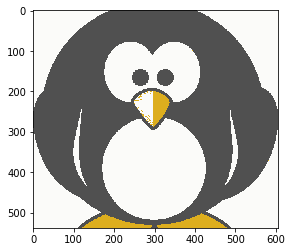

聚类第2次
diff =  331297.0
center : 401884467.0
costP - costNow : 331297.0
before 除法，中心点: 
 [[  2.04739300e+06   1.61575100e+06   3.38365000e+05   9.18400000e+03]
 [  3.75746640e+07   3.75021660e+07   3.73493350e+07   1.49209000e+05]
 [  1.34666020e+07   1.34588290e+07   1.34401910e+07   1.67097000e+05]]
after: 除法，中心点：
 [[ 222.93042247  175.93107578   36.84287892    1.        ]
 [ 251.82572097  251.33983875  250.31556407    1.        ]
 [  80.59152468   80.54500679   80.43346679    1.        ]]
去掉计数列，中心点：
 [[222 175  36]
 [251 251 250]
 [ 80  80  80]]
E =  401588050.0


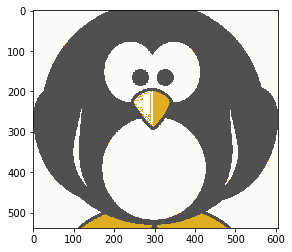

聚类第3次
diff =  296417.0
center : 401588050.0
costP - costNow : 296417.0
before 除法，中心点: 
 [[  2.40444900e+06   1.92363100e+06   5.41394000e+05   1.06280000e+04]
 [  3.72270010e+07   3.72036840e+07   3.71556860e+07   1.47823000e+05]
 [  1.34572090e+07   1.34494310e+07   1.34308110e+07   1.67039000e+05]]
after: 除法，中心点：
 [[ 226.23720361  180.99651863   50.94034626    1.        ]
 [ 251.83497155  251.67723561  251.35253648    1.        ]
 [  80.56327564   80.51671167   80.40524069    1.        ]]
去掉计数列，中心点：
 [[226 180  50]
 [251 251 251]
 [ 80  80  80]]
E =  401023238.0


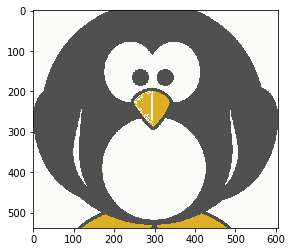

聚类第4次
diff =  564812.0
center : 401023238.0
costP - costNow : 564812.0
before 除法，中心点: 
 [[  2.58501700e+06   2.08451700e+06   6.62754000e+05   1.14350000e+04]
 [  3.70697840e+07   3.70662960e+07   3.70583230e+07   1.47164000e+05]
 [  1.34338580e+07   1.34259330e+07   1.34068140e+07   1.66891000e+05]]
after: 除法，中心点：
 [[ 226.06182772  182.29269786   57.95837341    1.        ]
 [ 251.89437634  251.87067489  251.81649724    1.        ]
 [  80.494802     80.44731591   80.33275611    1.        ]]
去掉计数列，中心点：
 [[226 182  57]
 [251 251 251]
 [ 80  80  80]]
E =  396266098.0


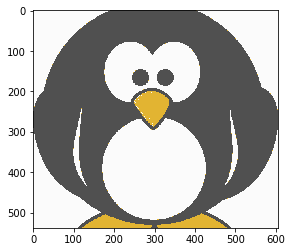

聚类第5次
diff =  4757140.0
center : 396266098.0
costP - costNow : 4757140.0
before 除法，中心点: 
 [[  2.61993800e+06   2.11776400e+06   6.93147000e+05   1.16190000e+04]
 [  3.70422220e+07   3.70404920e+07   3.70357260e+07   1.47028000e+05]
 [  1.34264990e+07   1.34184900e+07   1.33990180e+07   1.66843000e+05]]
after: 除法，中心点：
 [[ 225.48739134  182.26732077   59.65633876    1.        ]
 [ 251.93991621  251.92814974  251.89573415    1.        ]
 [  80.47385266   80.42584945   80.30914093    1.        ]]
去掉计数列，中心点：
 [[225 182  59]
 [251 251 251]
 [ 80  80  80]]
E =  395355941.0


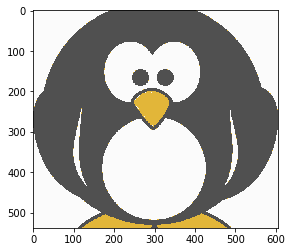

聚类第6次
diff =  910157.0
center : 395355941.0
costP - costNow : 910157.0
before 除法，中心点: 
 [[  2.62816200e+06   2.12575200e+06   7.00550000e+05   1.16660000e+04]
 [  3.70367130e+07   3.70351570e+07   3.70307170e+07   1.46999000e+05]
 [  1.34237840e+07   1.34158370e+07   1.33966240e+07   1.66825000e+05]]
after: 除法，中心点：
 [[ 225.28390194  182.21772673   60.05057432    1.        ]
 [ 251.95214253  251.94155743  251.91135314    1.        ]
 [  80.46626105   80.41862431   80.30345572    1.        ]]
去掉计数列，中心点：
 [[225 182  60]
 [251 251 251]
 [ 80  80  80]]
E =  395269931.0


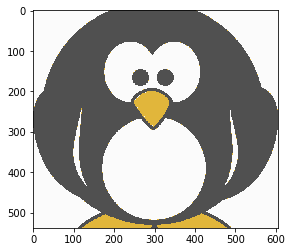

聚类第7次
diff =  86010.0
center : 395269931.0
costP - costNow : 86010.0
before 除法，中心点: 
 [[  2.62878300e+06   2.12633300e+06   7.01113000e+05   1.16680000e+04]
 [  3.70357960e+07   3.70343150e+07   3.70300830e+07   1.46995000e+05]
 [  1.34240800e+07   1.34160980e+07   1.33966950e+07   1.66827000e+05]]
after: 除法，中心点：
 [[ 225.29850874  182.23628728   60.08853274    1.        ]
 [ 251.9527603   251.94268513  251.91389503    1.        ]
 [  80.46707068   80.41922471   80.30291859    1.        ]]
去掉计数列，中心点：
 [[225 182  60]
 [251 251 251]
 [ 80  80  80]]
E =  395256483.0


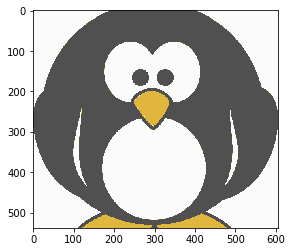

聚类第8次
diff =  13448.0
center : 395256483.0
costP - costNow : 13448.0
before 除法，中心点: 
 [[  2.62878300e+06   2.12633300e+06   7.01113000e+05   1.16680000e+04]
 [  3.70357960e+07   3.70343150e+07   3.70300830e+07   1.46995000e+05]
 [  1.34240800e+07   1.34160980e+07   1.33966950e+07   1.66827000e+05]]
after: 除法，中心点：
 [[ 225.29850874  182.23628728   60.08853274    1.        ]
 [ 251.9527603   251.94268513  251.91389503    1.        ]
 [  80.46707068   80.41922471   80.30291859    1.        ]]
去掉计数列，中心点：
 [[225 182  60]
 [251 251 251]
 [ 80  80  80]]
E =  395256483.0


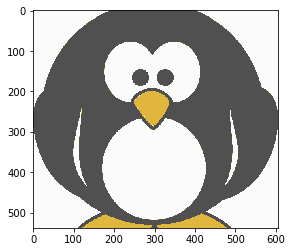

聚类第9次
diff =  0.0


In [10]:
My_Kmeans(image1, 3, log=True, rand=False)

# 对 企鹅 图像进行聚类

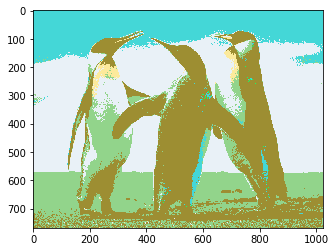

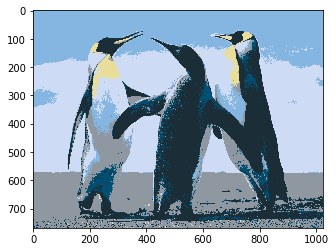

聚类第0次
diff =  8461406482.0


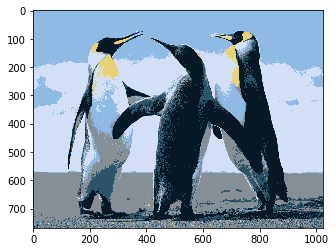

聚类第1次
diff =  515652280.0


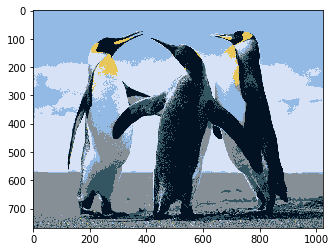

聚类第2次
diff =  47892609.0


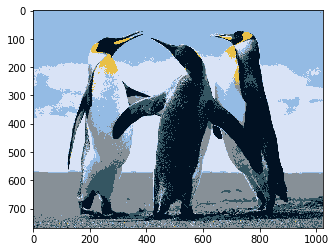

聚类第3次
diff =  10281813.0


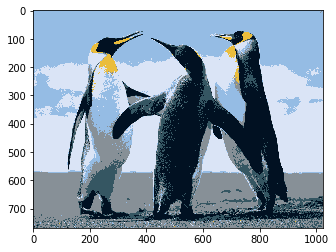

聚类第4次
diff =  3799856.0


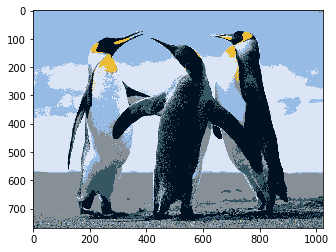

聚类第5次
diff =  2206509.0


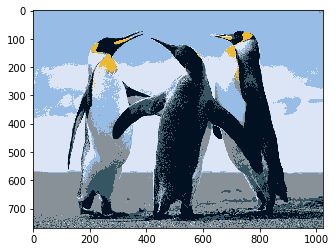

聚类第6次
diff =  1212770.0


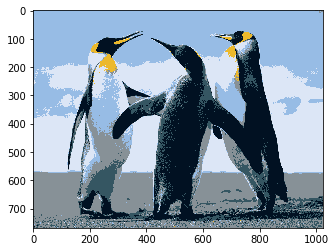

聚类第7次
diff =  388280.0


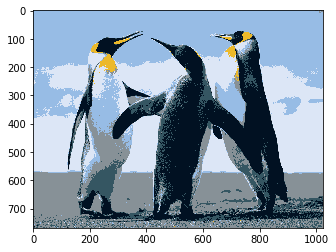

聚类第8次
diff =  18225.0


KeyboardInterrupt: 

In [13]:
My_Kmeans(image2, 6, log=False, rand=True)

# 对沙漠图像进行聚类

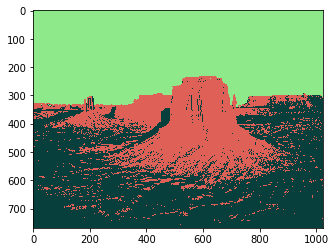

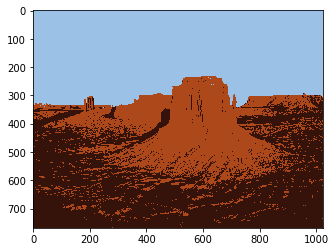

聚类第0次
diff =  6458189008.0


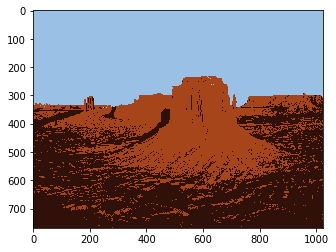

聚类第1次
diff =  22430456.0


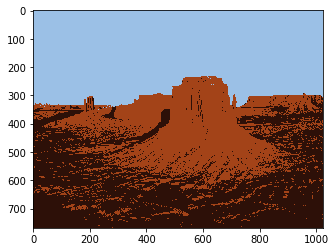

聚类第2次
diff =  4408134.0


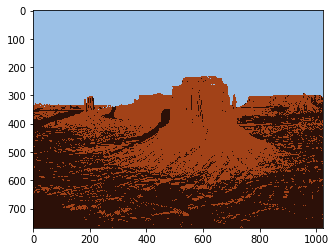

聚类第3次
diff =  223046.0


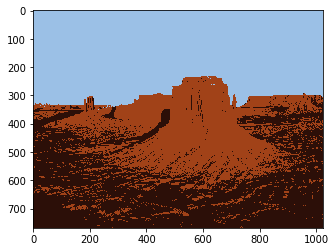

聚类第4次
diff =  -182334.0


In [14]:
My_Kmeans(image, 3, log=False, rand=True)

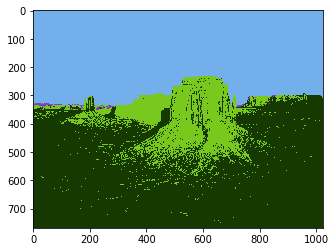

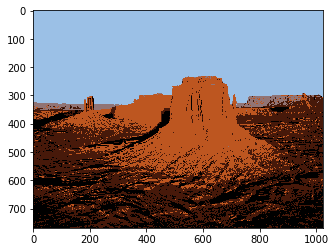

聚类第0次
diff =  4412647120.0


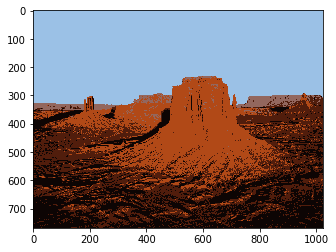

聚类第1次
diff =  152306454.0


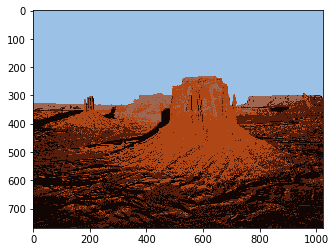

聚类第2次
diff =  32911925.0


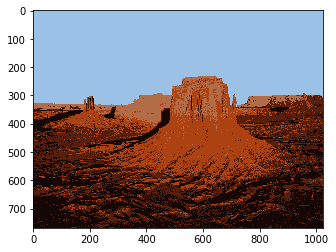

聚类第3次
diff =  41370878.0


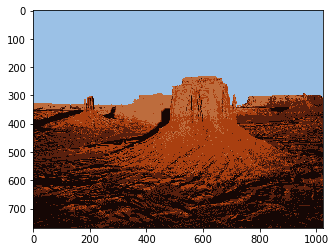

聚类第4次
diff =  20097914.0


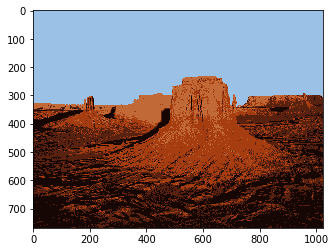

聚类第5次
diff =  7451714.0


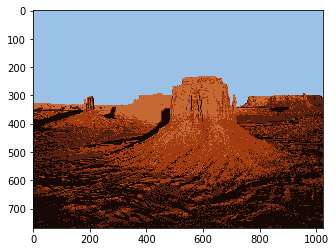

聚类第6次
diff =  3163178.0


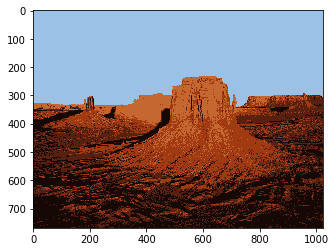

聚类第7次
diff =  1563989.0


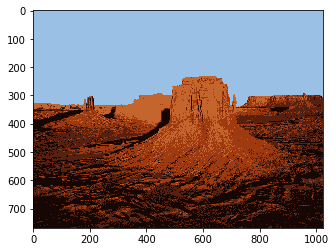

聚类第8次
diff =  653149.0


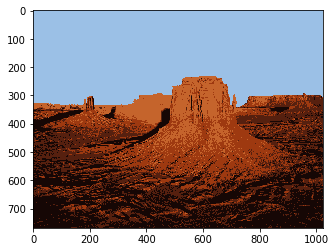

聚类第9次
diff =  693203.0


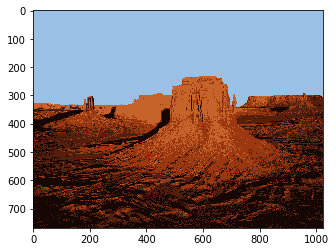

聚类第10次
diff =  595181.0


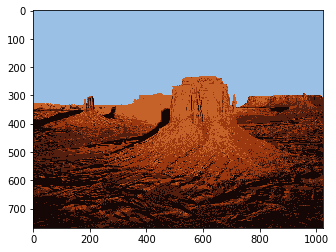

聚类第11次
diff =  375834.0


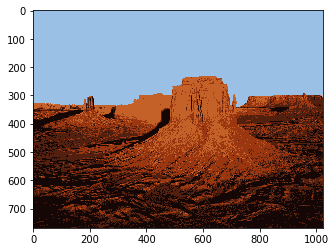

聚类第12次
diff =  393475.0


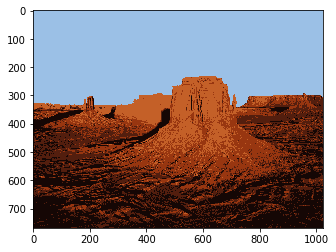

聚类第13次
diff =  357221.0


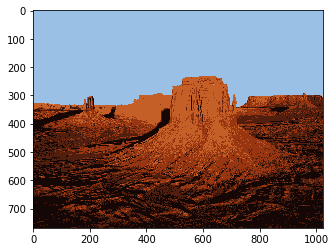

聚类第14次
diff =  269261.0


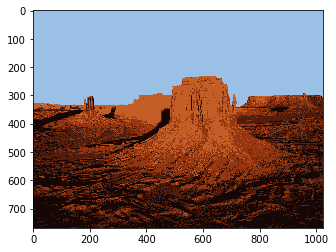

聚类第15次
diff =  106309.0


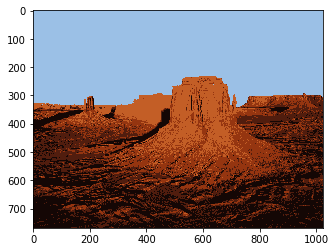

聚类第16次
diff =  5379.0


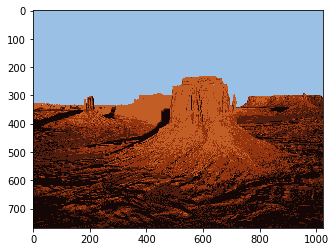

聚类第17次
diff =  115793.0


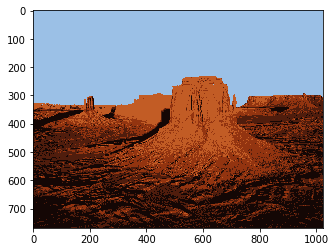

聚类第18次
diff =  -100555.0


In [15]:
My_Kmeans(image, 5, log=False, rand=True)